<a href="https://colab.research.google.com/github/AryaJeet1364/QuantumComputing/blob/main/BellStates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installations

In [1]:
!pip install qiskit -q
!pip install qiskit[visualization] -q
import qiskit as qk

!pip install qiskit-aer -q
import qiskit_aer as qk_aer

from matplotlib import pyplot as plt
%matplotlib inline

Imports

In [2]:
import qiskit as qk
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display

In [3]:
def show_results(qc):
  # Display the circuit (matplotlib style with Clifford gates)
  display(qc.draw('mpl', style='clifford', scale=1))

  # Setup simulator backend
  backend = AerSimulator()

  # Transpile the circuit for the backend
  qc_exe = qk.transpile(qc, backend)

  # Run the circuit on the simulator with 1000 shots
  result = backend.run(qc_exe, shots=1000).result()
  counts = result.get_counts()

  # Print the measurement results
  print("Measurement results:", counts)

  # Plot and display the histogram of results
  fig = plot_histogram(counts)
  display(fig)

The Bell state $\lvert \Phi^+ \rangle$ :

$$
\lvert \Phi^+ \rangle = \frac{\lvert 00 \rangle + \lvert 11 \rangle}{\sqrt{2}}.
$$

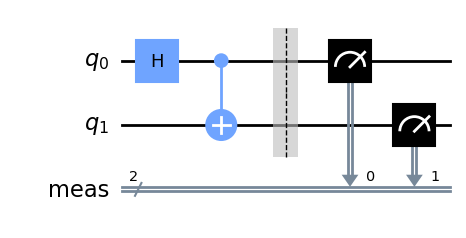

Measurement results: {'11': 532, '00': 468}


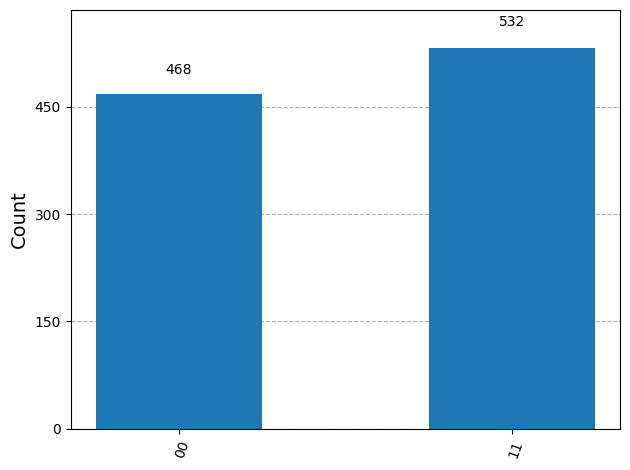

In [4]:
# Bell state Φ⁺ = (|00> + |11>) / sqrt(2)
qc = qk.QuantumCircuit(2)
qc.h(0)         # Put qubit 0 into superposition: (|0> + |1>) / sqrt(2)
qc.cx(0, 1)     # CNOT entangles qubit 0 and 1, creating (|00> + |11>) / sqrt(2)
qc.measure_all()
show_results(qc)

The Bell state $\lvert \Phi^- \rangle$ :

$$
\lvert \Phi^- \rangle = \frac{\lvert 00 \rangle - \lvert 11 \rangle}{\sqrt{2}}.
$$



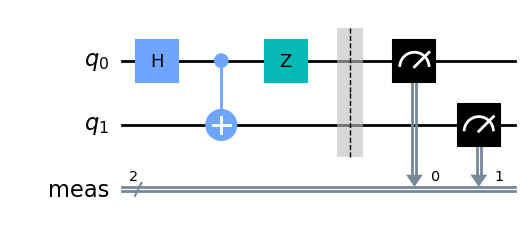

Measurement results: {'00': 468, '11': 532}


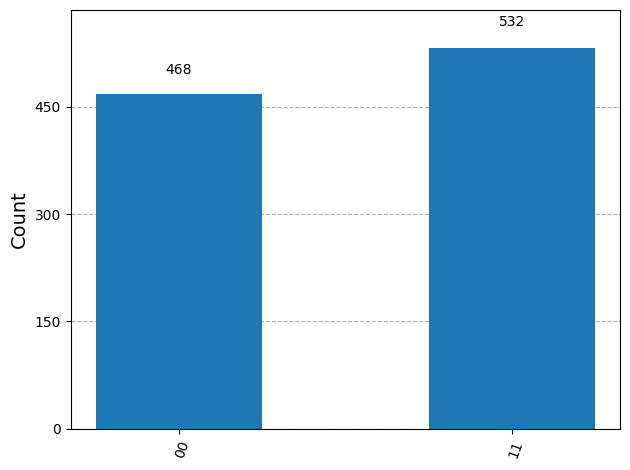

In [5]:
# Bell state Φ⁻ = (|00> - |11>) / sqrt(2)
qc = qk.QuantumCircuit(2)
qc.h(0)         # Create superposition on qubit 0
qc.cx(0, 1)     # Entangle qubits
qc.z(0)         # Apply Z gate to qubit 0, flipping phase of |11> component -> Φ⁻ state
qc.measure_all()
show_results(qc)

The Bell state $\lvert \Psi^+ \rangle$ :

$$
\lvert \Psi^+ \rangle = \frac{\lvert 01 \rangle + \lvert 10 \rangle}{\sqrt{2}}.
$$


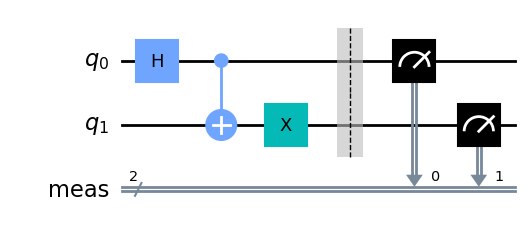

Measurement results: {'10': 533, '01': 467}


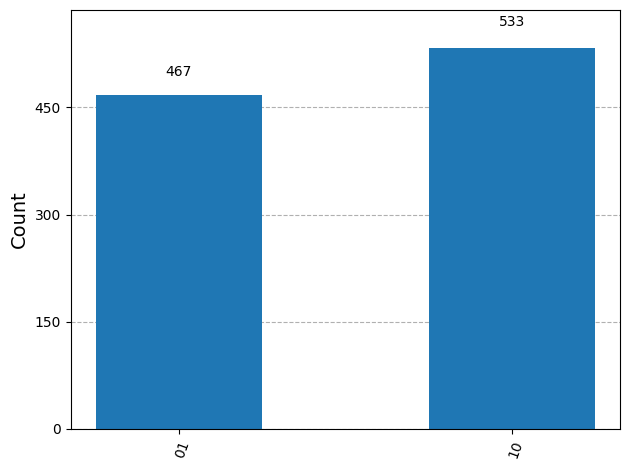

In [6]:
# Bell state Ψ⁺ = (|01> + |10>) / sqrt(2)
qc = qk.QuantumCircuit(2)
qc.h(0)         # Superposition on qubit 0
qc.cx(0, 1)     # Entangle qubits -> Φ⁺ state
qc.x(1)         # Flip qubit 1 to get Ψ⁺ = (|01> + |10>) / sqrt(2)
qc.measure_all()
show_results(qc)

The Bell state $\lvert \Psi^- \rangle$ :

$$
\lvert \Psi^- \rangle = \frac{\lvert 01 \rangle - \lvert 10 \rangle}{\sqrt{2}}.
$$

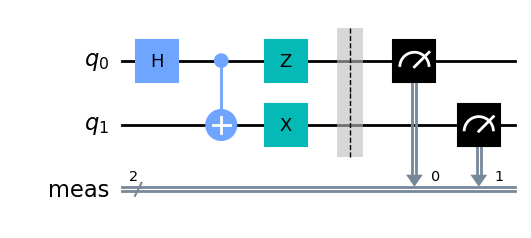

Measurement results: {'10': 511, '01': 489}


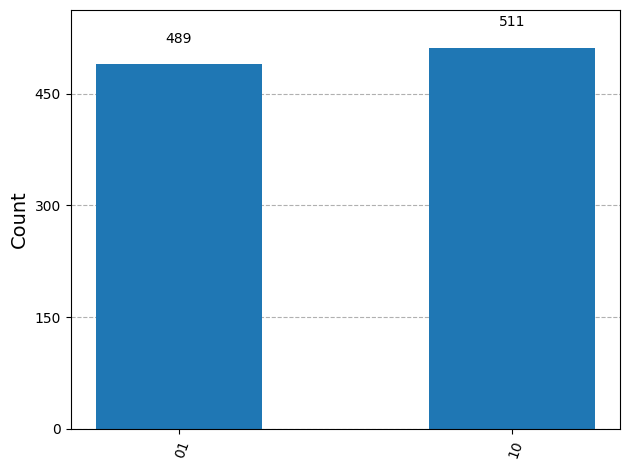

In [7]:
# Bell state Ψ⁻ = (|01> - |10>) / sqrt(2)
qc = qk.QuantumCircuit(2)
qc.h(0)         # (|0> + |1>) / sqrt(2)
qc.cx(0, 1)     # Entangled -> (|00> + |11>) / sqrt(2) = |Φ⁺>
qc.x(1)         # Bit flip on qubit 1 → |01> + |10>
qc.z(0)         # Z gate on qubit 0 → |01> - |10>
qc.measure_all()
show_results(qc)